In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    '../dataset/mydata_v1/h57.csv',
    parse_dates=['date'],   # 自动转 datetime
    index_col='date'        # 设为索引
)

In [2]:
print(df.columns)

Index(['cpr1', 'cpr2', 'cpr3', 'cdr_pump', 'cdr_fan1', 'cdr_fan2', 'cdr_fan3',
       'cp_in_pa', 'cp_in_temp', 'cp_ex_pa', 'cp_liq_temp', 'cp_ex_temp',
       'cp_env_temp', 'fre3_fan1', 'fre1_fan1', 'fre2_fan1', 'fre3_fan2',
       'fre1_fan2', 'fre2_fan2', 'pf_fan1&2', 'fre1_fan3', 'fre2_fan3',
       'fre3_fan3', 'pf_fan3&4', 'fre3_fan4', 'fre1_fan4', 'fre2_fan4',
       'fre1_fan5', 'pf_fan5&6', 'fre1_fan6', 'fre1_temp1', 'fre1_temp2',
       'fre1_temp3', 'fre1_temp4', 'fre1_temp5', 'fre1_temp6', 'fre1_temp_avg',
       'fre2_door1', 'fre2_door2', 'fre2_door3', 'fre2_temp1', 'fre2_temp2',
       'fre2_temp3', 'fre2_temp4', 'fre2_temp_avg', 'fre3_temp1', 'fre3_temp2',
       'fre3_temp3', 'fre3_temp4', 'fre3_temp_avg', 'OT', 'fre1_temp_up',
       'fre1_temp_low', 'fre2_temp_up', 'fre2_temp_low', 'fre3_temp_up',
       'fre3_temp_low'],
      dtype='object')


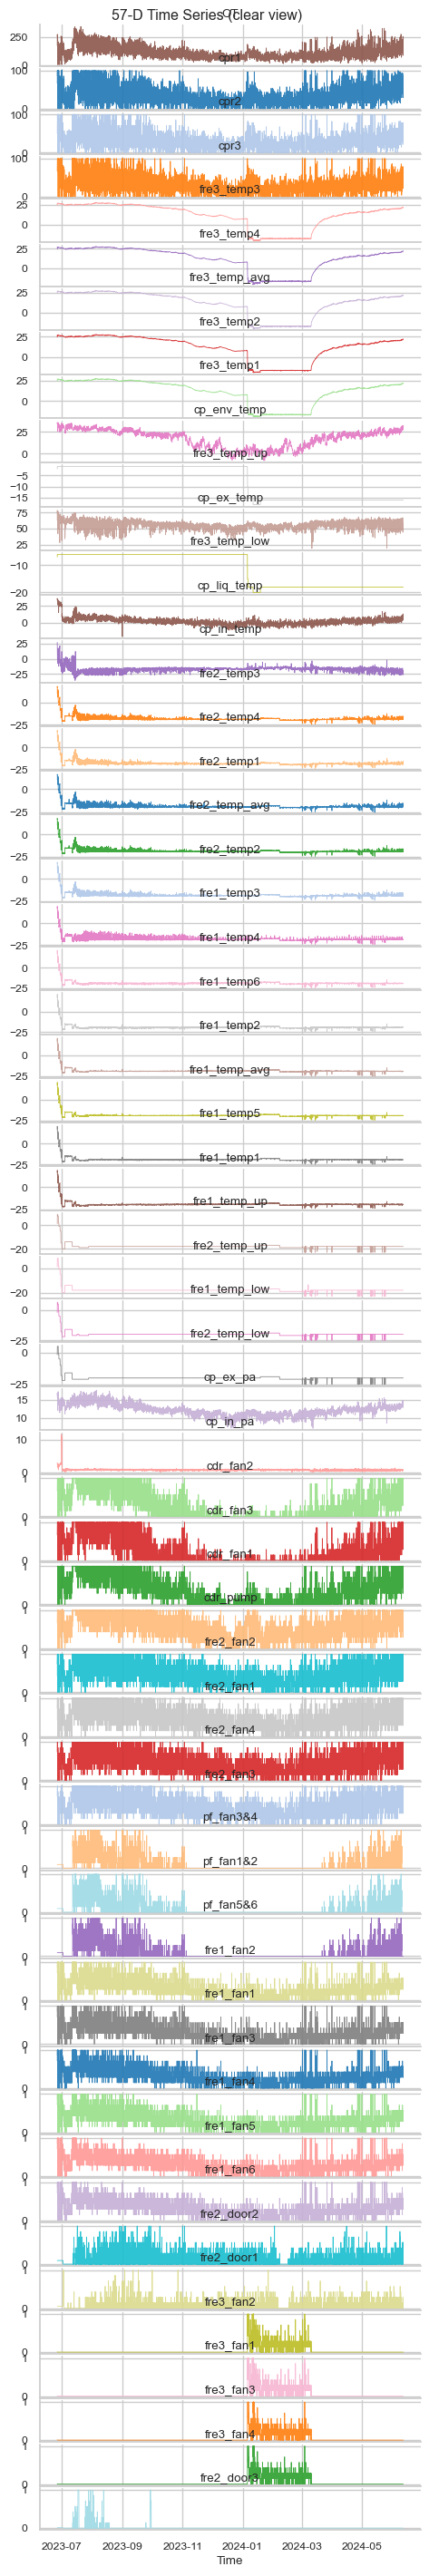

In [58]:
sns.set_theme(style="whitegrid", font_scale=0.8)
g = sns.FacetGrid(data=df.reset_index().melt(id_vars='date',
                                             var_name='channel',
                                             value_name='value'),
                  row='channel', hue='channel',
                  height=0.5, aspect=10,  # 高 0.5 英寸，宽 10 英寸
                  sharey=False,           # 各通道 y 轴独立
                  sharex=True,            # 共用时间轴
                  palette='tab20',        # 20 色循环
                  row_order=df.std().sort_values(ascending=False).index
                  )  # 按活跃降序

g.map(plt.plot, 'date', 'value', linewidth=0.6, alpha=0.9)
g.set_titles("{row_name}")          # 子图标题 = 通道名
g.set_axis_labels("Time", "")       # 只留最底部 x 轴
g.fig.subplots_adjust(hspace=0.05)  # 子图竖向间距几乎 0
plt.suptitle('57-D Time Series (clear view)', y=0.995)
plt.show()

In [56]:
print(df.columns)

Index(['cpr1', 'cpr2', 'cpr3', 'cdr_pump', 'cdr_fan1', 'cdr_fan2', 'cdr_fan3',
       'cp_in_pa', 'cp_in_temp', 'cp_ex_pa', 'cp_liq_temp', 'cp_ex_temp',
       'cp_env_temp', 'fre3_fan1', 'fre1_fan1', 'fre2_fan1', 'fre3_fan2',
       'fre1_fan2', 'fre2_fan2', 'pf_fan1&2', 'fre1_fan3', 'fre2_fan3',
       'fre3_fan3', 'pf_fan3&4', 'fre3_fan4', 'fre1_fan4', 'fre2_fan4',
       'fre1_fan5', 'pf_fan5&6', 'fre1_fan6', 'fre1_temp1', 'fre1_temp2',
       'fre1_temp3', 'fre1_temp4', 'fre1_temp5', 'fre1_temp6', 'fre1_temp_avg',
       'fre2_door1', 'fre2_door2', 'fre2_door3', 'fre2_temp1', 'fre2_temp2',
       'fre2_temp3', 'fre2_temp4', 'fre2_temp_avg', 'fre3_temp1', 'fre3_temp2',
       'fre3_temp3', 'fre3_temp4', 'fre3_temp_avg', 'OT', 'fre1_temp_up',
       'fre1_temp_low', 'fre2_temp_up', 'fre2_temp_low', 'fre3_temp_up',
       'fre3_temp_low'],
      dtype='object')


In [8]:
from sklearn.preprocessing import StandardScaler

df_norm = pd.DataFrame(StandardScaler().fit_transform(df),
                          columns=df.columns,
                          index=df.index)


In [9]:
print(df_norm.head())
T, C = df.shape
print('长度:', T, '维度:', C)

                         cpr1      cpr2      cpr3  cdr_pump  cdr_fan1  \
date                                                                    
2023-06-26 18:00:00  1.513390  0.988471  1.771940  0.401570  1.825564   
2023-06-26 19:00:00  2.992181  3.359237  3.365832  1.545281  1.825564   
2023-06-26 20:00:00  2.992181  3.359237  3.365832  1.545281  1.825564   
2023-06-26 21:00:00  2.992181  3.359237  3.365832  1.545281  1.825564   
2023-06-26 22:00:00  2.358414  3.359237  3.365832  1.545281  1.825564   

                     cdr_fan2  cdr_fan3  cp_in_pa  cp_in_temp  cp_ex_pa  ...  \
date                                                                     ...   
2023-06-26 18:00:00  1.030156   1.21425  5.751175   11.187973  2.602625  ...   
2023-06-26 19:00:00  1.981967   2.17536  5.007529    9.381299  3.140259  ...   
2023-06-26 20:00:00  1.981967   2.17536  4.482048    8.399966  2.999802  ...   
2023-06-26 21:00:00  1.981967   2.17536  4.115435    6.330181  2.735597  ...   
2023-06-

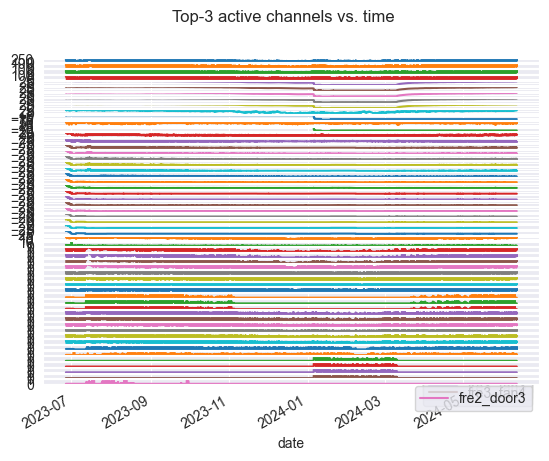

<Figure size 800x1600 with 0 Axes>

In [50]:

top3 = df.std().nlargest(57).index[0:57]


df[top3].plot(subplots=True, sharex=True, title='Top-3 active channels vs. time')
plt.figure(figsize=(8,16))
plt.tight_layout(); plt.show()

<Figure size 800x1600 with 0 Axes>

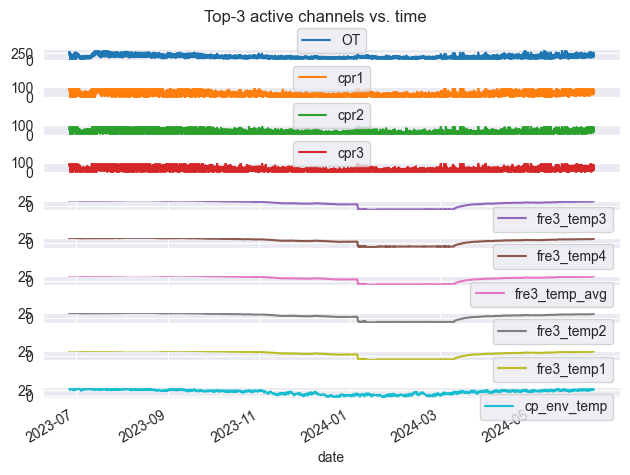

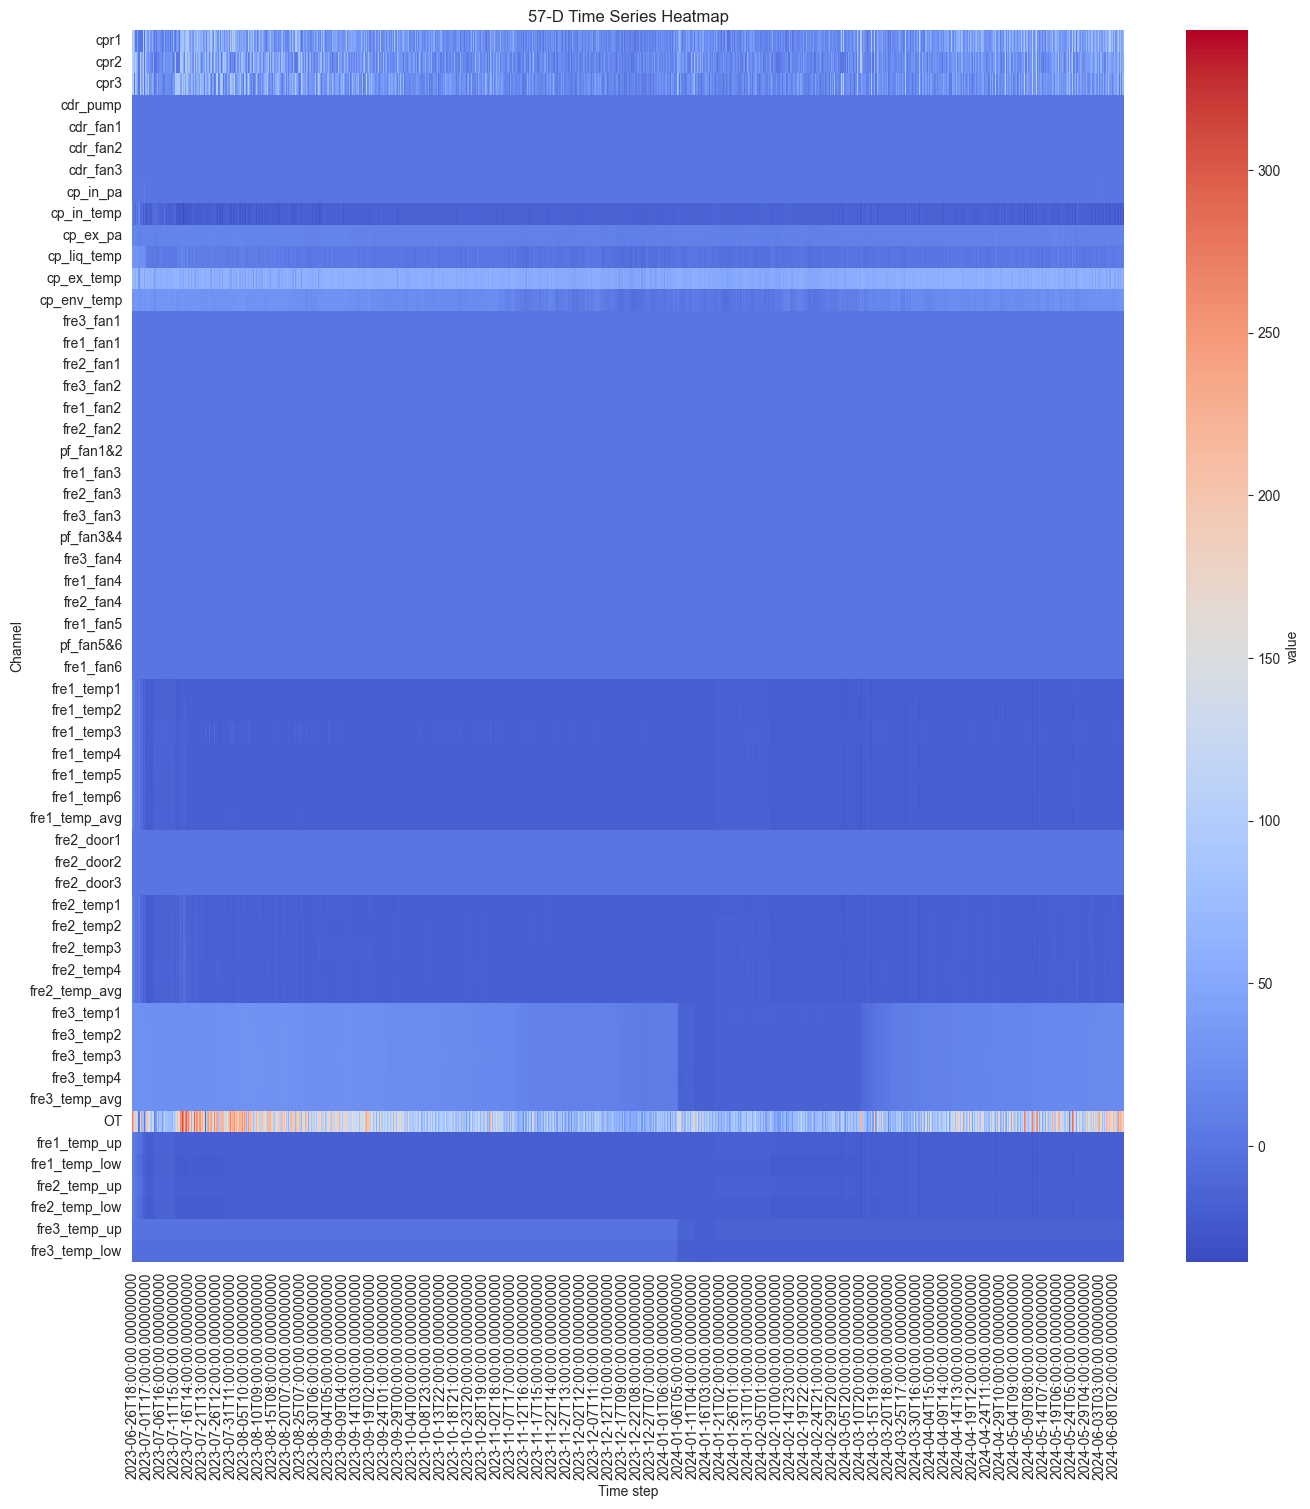

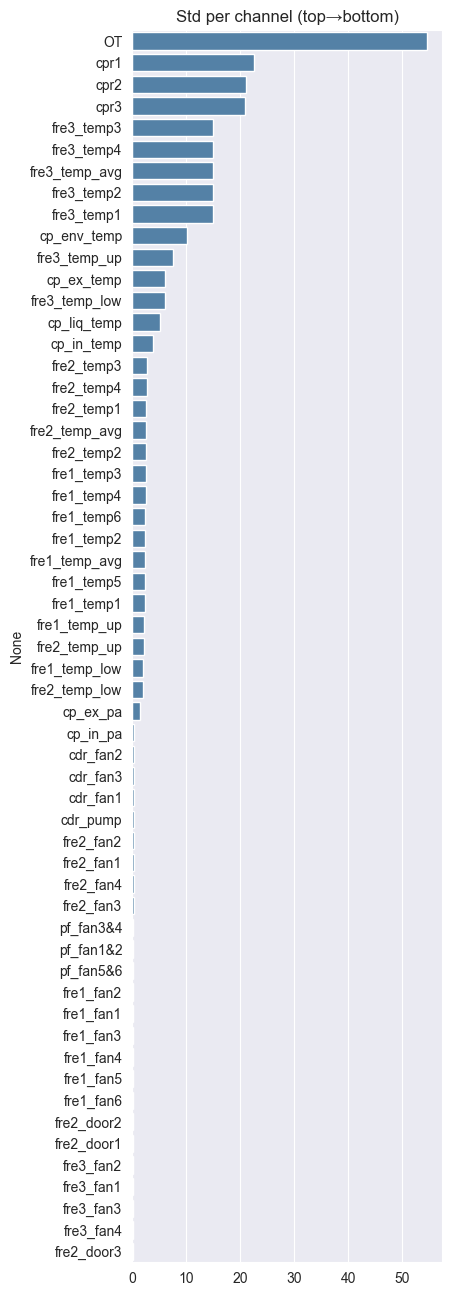

In [35]:

plt.figure(figsize=(16,16))
sns.heatmap(df.T, cmap='coolwarm', cbar_kws={'label':'value'})
plt.title('57-D Time Series Heatmap')
plt.xlabel('Time step'); plt.ylabel('Channel'); plt.show()

std57 = df.std().sort_values(ascending=False)
plt.figure(figsize=(4,16))
sns.barplot(x=std57.values, y=std57.index, color='steelblue')
plt.title('Std per channel (top→bottom)')
plt.show()

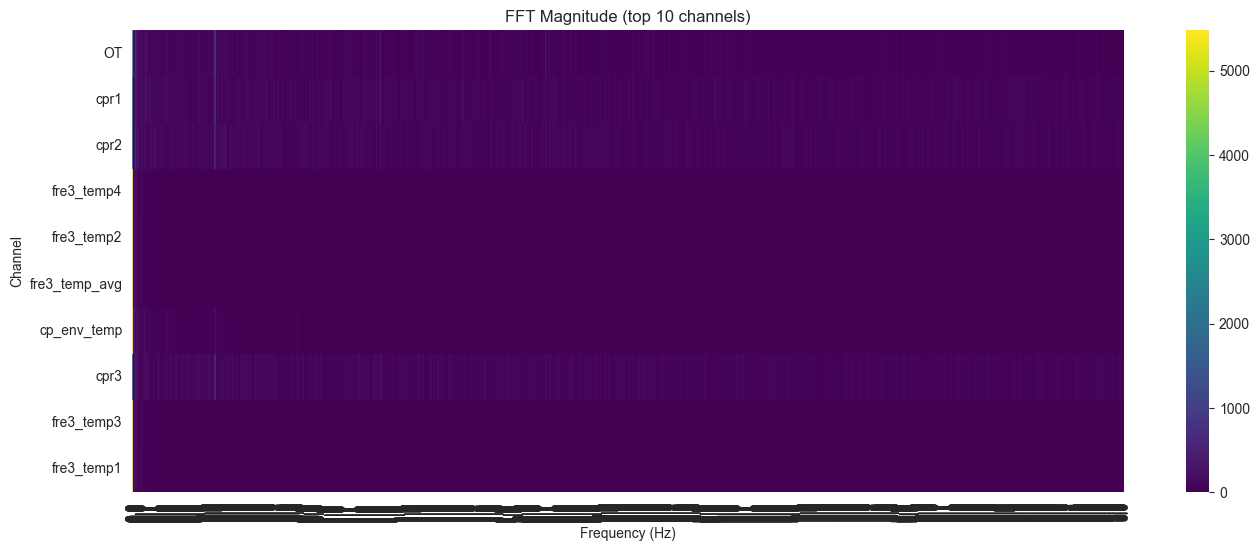

In [32]:
from sklearn.preprocessing import StandardScaler
fs = 10   # 采样率（自己改）
top_channels = ['OT','cpr1','cpr2','cpr3','fre3_temp3','fre3_temp4','fre3_temp_avg','fre3_temp2','fre3_temp1','cp_env_temp']

df_norm = pd.DataFrame(StandardScaler().fit_transform(df),
                          columns=df.columns,
                          index=df.index)
df_norm = df_norm[top_channels]

std57 = df_norm.std().sort_values(ascending=False)
top_ch = std57.index[:10].tolist()   # 只画最活跃的 10 维
fft_vals = np.abs(np.fft.rfft(df_norm[top_ch], axis=0))
freqs = np.fft.rfftfreq(T, d=1/fs)
plt.figure(figsize=(16,6))
sns.heatmap(fft_vals.T, cmap='viridis',
            xticklabels=np.round(freqs,1), yticklabels=top_ch)
plt.title('FFT Magnitude (top 10 channels)')
plt.xlabel('Frequency (Hz)'); plt.ylabel('Channel'); plt.show()

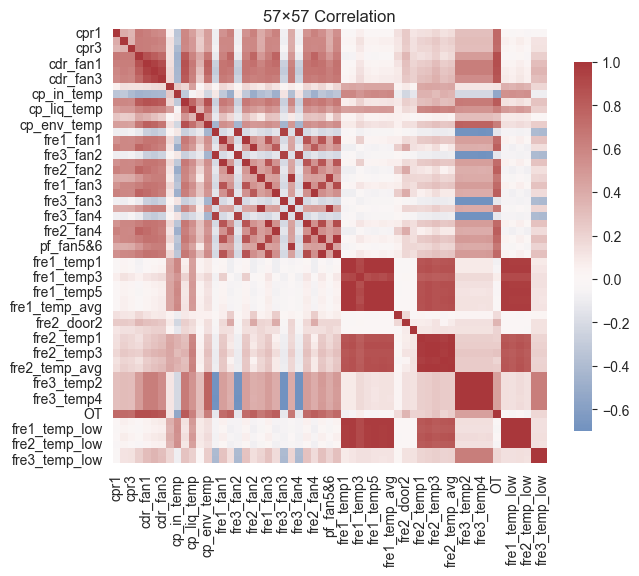

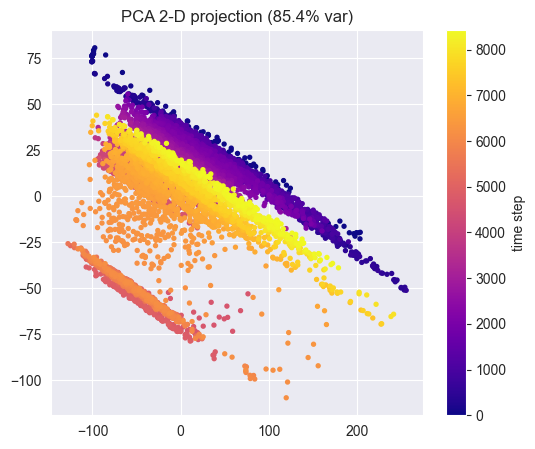

前2维解释方差: 0.8537818846021787
前5维解释方差: 0.9708717902037259


In [19]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap='vlag', center=0, square=True, cbar_kws={'shrink':.8})
plt.title('57×57 Correlation')
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

plt.figure(figsize=(6,5))
plt.scatter(pc[:,0], pc[:,1], c=np.arange(T), cmap='plasma', s=8)
plt.colorbar(label='time step')
plt.title(f'PCA 2-D projection ({pca.explained_variance_ratio_[:2].sum():.1%} var)')
plt.show()

pca = PCA().fit(df)                       # 全部主成分
cumvar = np.cumsum(pca.explained_variance_ratio_)
print('前2维解释方差:', cumvar[1])
print('前5维解释方差:', cumvar[4])